# Part 1

In [1]:
import numpy as np
from functools import reduce

In [2]:
class Tree:
    def __init__(self, tree_heights):
        self.tree_heights = tree_heights
        
    def get_visible_trees(self, direction):
        n, m = self.tree_heights.shape
        
        if direction == 'left':
            return self._get_visible_trees(self.tree_heights)
        elif direction == 'right':
            return self._get_visible_trees(self.tree_heights[:, ::-1])[:, ::-1]
        elif direction == 'top':
            return self._get_visible_trees(self.tree_heights.T).T
        elif direction == 'bottom':
            return self._get_visible_trees(self.tree_heights.T[:, ::-1])[:, ::-1].T
        elif direction == 'all':
            return sum([self.get_visible_trees(direction) 
                        for direction in ['left', 'right', 'top', 'bottom']])
        
        raise ValueError(f"{direction} not understood")
        
    @staticmethod
    def _get_visible_trees(tree_heights):
        visible_trees = np.zeros(tree_heights.shape).astype(bool)
        n, m = tree_heights.shape

        for i in range(n):
            max_tree_height = -1
            for j in range(m):
                current_tree_height = tree_heights[i, j]
                if current_tree_height > max_tree_height:
                    visible_trees[i, j] = True

                max_tree_height = max(max_tree_height, tree_heights[i, j])
                
        return visible_trees

In [3]:
with open('data/day08.txt', 'r') as file:
    lines = file.readlines()

In [4]:
tree_heights = []

for line in lines:
    cleaned_line = line.replace('\n', '')
    
    tree_heights.append([int(x) for x in cleaned_line])
    
tree_heights = np.array(tree_heights)

In [5]:
trees = Tree(tree_heights)

In [6]:
np.sum(trees.get_visible_trees('all') > 0)

1679

# Part 2

In [7]:
class Tree:
    def __init__(self, tree_heights):
        self.tree_heights = tree_heights
        
    def get_visible_trees(self, direction):
        n, m = self.tree_heights.shape
        
        if direction == 'left':
            return self._get_visible_trees(self.tree_heights)
        elif direction == 'right':
            return self._get_visible_trees(self.tree_heights[:, ::-1])[:, ::-1]
        elif direction == 'top':
            return self._get_visible_trees(self.tree_heights.T).T
        elif direction == 'bottom':
            return self._get_visible_trees(self.tree_heights.T[:, ::-1])[:, ::-1].T
        elif direction == 'all':
            return sum([self.get_visible_trees(direction) 
                        for direction in ['left', 'right', 'top', 'bottom']])
        
        raise ValueError(f"{direction} not understood")
        
    @staticmethod
    def _get_visible_trees(tree_heights):
        visible_trees = np.zeros(tree_heights.shape).astype(bool)
        n, m = tree_heights.shape

        for i in range(n):
            max_tree_height = -1
            for j in range(m):
                current_tree_height = tree_heights[i, j]
                if current_tree_height > max_tree_height:
                    visible_trees[i, j] = True

                max_tree_height = max(max_tree_height, tree_heights[i, j])
                
        return visible_trees
    
    def get_scenic_scores(self, direction):
        n, m = self.tree_heights.shape
        
        if direction == 'left':
            return self._get_scenic_scores(self.tree_heights)
        elif direction == 'right':
            return self._get_scenic_scores(self.tree_heights[:, ::-1])[:, ::-1]
        elif direction == 'top':
            return self._get_scenic_scores(self.tree_heights.T).T
        elif direction == 'bottom':
            return self._get_scenic_scores(self.tree_heights.T[:, ::-1])[:, ::-1].T
        elif direction == 'all':
            return reduce(lambda x, y: x * y,
                          [self.get_scenic_scores(direction) 
                           for direction in ['left', 'right', 'top', 'bottom']],
                          1)
        
        raise ValueError(f"{direction} not understood")
        
    @staticmethod
    def _get_scenic_scores(tree_heights):
        scenic_scores = np.zeros(tree_heights.shape)
        n, m = tree_heights.shape

        for i in range(n):
            best_score_for_height = np.zeros(10)
            for j in reversed(range(m)):
                current_height = tree_heights[i, j]

                if j == m - 1:
                    scenic_scores[i, j] = best_score_for_height[current_height]
                else:
                    scenic_scores[i, j] = best_score_for_height[current_height]

                best_score_for_height[current_height + 1:] += 1
                best_score_for_height[:current_height + 1] = 1

        return scenic_scores

In [8]:
trees = Tree(tree_heights)

In [9]:
np.max(trees.get_scenic_scores('all'))

536625.0

# Random Stuff

In [11]:
import seaborn as sns

<AxesSubplot: >

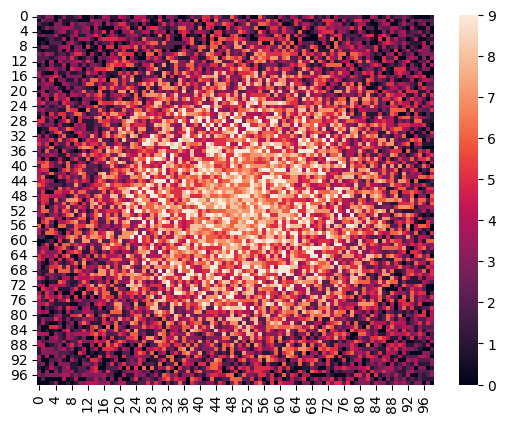

In [12]:
sns.heatmap(tree_heights)

<AxesSubplot: >

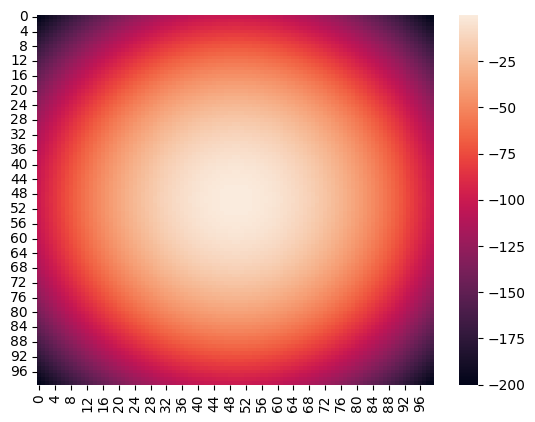

In [13]:
X = np.linspace(-1, 1, 100)
Y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(X, Y)

Z = -(X**2 + Y**2) * 100
sns.heatmap(Z)